
Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


Confusion Matrix:
 [[1 0]
 [2 0]]


C:\Users\mohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


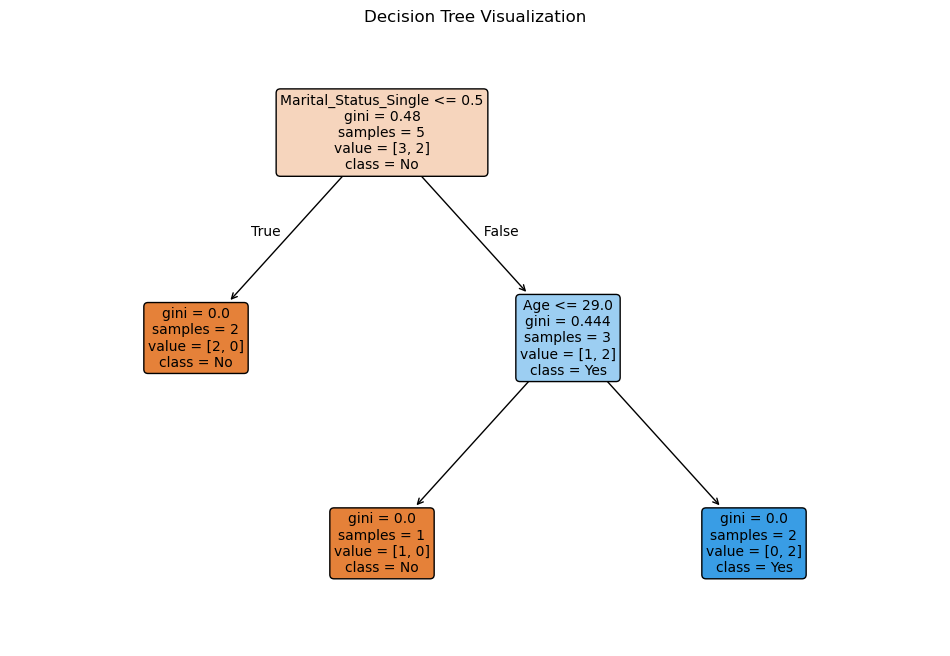


Decision Tree Rules:

|--- Marital_Status_Single <= 0.50
|   |--- class: 0
|--- Marital_Status_Single >  0.50
|   |--- Age <= 29.00
|   |   |--- class: 0
|   |--- Age >  29.00
|   |   |--- class: 1



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Create a simple dataset
data = {
    'Age': [25, 45, 35, 50, 23, 33, 43, 37],S
    'Income': ['Low', 'High', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low'],
    'Marital_Status': ['Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married'],
    'Purchase': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Income', 'Marital_Status'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Purchase'])
y = df['Purchase'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Display textual representation of the tree
print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(X.columns)))
